# **Connecting Google Drive to the Google Colab Environment**

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# import statements to import all the libraries that we use

import tensorflow as tf

import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras import Model
from tensorflow.python.keras import models

from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
from keras.utils import np_utils
import numpy as np
%matplotlib inline

mnist = tf.keras.datasets.mnist # importing the MNIST dataset from Keras

In [22]:
# Checking the version of tensorflow
print(tf.__version__)
# Are we running with Eager execution?
print(tf.executing_eagerly())

2.3.0
True


In [23]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # Loading the MNIST data into local variables

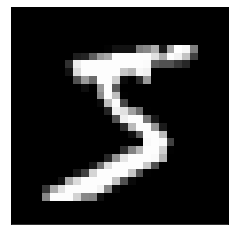

In [24]:
fig = plt.imshow(X_train[0], cmap='gray') # Shows an example image of the MNIST dataset 
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

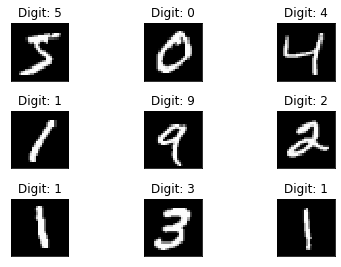

In [25]:
# Gives the first 9 images from the dataset as example images

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [26]:
X_train = X_train.reshape(60000, 28, 28, 1) / X_train.max() # Normalizes the training data and reshapes to the needed dimensions
X_test = X_test.reshape(10000, 28, 28, 1) / X_test.max()  # Normalizes the testing data and reshapes to the needed dimensions

# **Defining the Layers in the Model**

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

# **Training the Model**

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1480 - accuracy: 0.9541
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0474 - accuracy: 0.9855
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0344 - accuracy: 0.9892
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0265 - accuracy: 0.9913
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0200 - accuracy: 0.9934


# **Metrics**

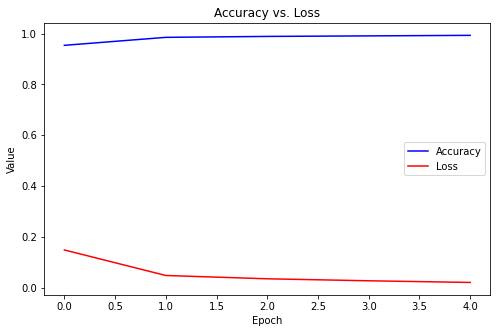

In [30]:
# Accuracy vs. Loss Graph from the Model Training

plt.figure(figsize = (8,5))
plt.plot(history.history['accuracy'], color = 'blue')
plt.plot(history.history['loss'], color = 'red')
plt.title('Accuracy vs. Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(['Accuracy', 'Loss'])

# **Model Accuracy**

In [31]:
# Tests the Model on the Test Data to determine an Accuracy

test_scores = model.evaluate(X_test, y_test)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0367 - accuracy: 0.9883
Test loss: 0.03667011484503746
Test accuracy: 0.9883000254631042


# **Confusion Matrix and Classification Report**

In [32]:
# Creates Predictions on the Test Data

predictions = np.argmax(model.predict(X_test), axis=-1)

In [33]:
# Classification Report and Confusion Matrix for the Model

print('Classification Report: ')
print(classification_report(y_test, predictions))
print('\n')
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, predictions)
print(cm)

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Confusion Matrix: 
[[ 960    1    2    1    1    0    4    3    0    8]
 [   0 1130    0    3    0    0    0    2    0    0]
 [   0    0 1022    2    0    0    0    7    1    0]
 [   0    0    2 1003    0    2    0 

# **Saving the Model**

In [34]:
model.save('/content/drive/MyDrive/.../BasicMNISTModel.h5')